In [63]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [64]:
header=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 
        'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
my_data = pd.read_csv("housing.csv", names=header, delim_whitespace=True)
x = my_data.drop(['MEDV'], axis=1)
y = my_data.MEDV
[rows,columns]=np.shape(x)

In [65]:
#Normalization x
for i in range(columns):
    max_x=max(x.iloc[:,i])
    min_x=min(x.iloc[:,i])
    x.iloc[:,i]=(x.iloc[:,i]-min_x)/(max_x-min_x)

In [66]:
#Normalization y
max_y=max(y.iloc[:])
min_y=min(y.iloc[:])

In [67]:
def splitTT(X_norm, percentTrain): 
    # Split dataset into train and test set based on the percentTrain specified
    # Random shuffling of data before splitting
    np.random.shuffle(np.array(X_norm))
    pd.DataFrame(X_norm)
    # Get index to split the data and slice the dataset based on the index
    index = round(len(X_norm)*percentTrain)
    X_train, X_test = X_norm.iloc[:index,:], X_norm.iloc[index:,:]
    X_split = [X_train, X_test]
    return X_split

In [68]:
def splitTTY(Y_norm, percentTrain): 
    # Split dataset into train and test set based on the percentTrain specified
    # Random shuffling of data before splitting
    np.random.shuffle(np.array(Y_norm))
    pd.DataFrame(Y_norm)
    # Get index to split the data and slice the dataset based on the index
    index = round(len(Y_norm)*percentTrain)
    Y_train, Y_test = Y_norm.iloc[:index], Y_norm.iloc[index:]
    Y_split = [Y_train, Y_test]
    return Y_split

In [69]:
x_train,x_test1=splitTT(x,0.6)
x_test,x_cv=splitTT(x_test1,0.5)
y_train,y_test1=splitTTY(y,0.6)
y_test,y_cv=splitTTY(y_test1,0.5)

In [70]:
def rmse(y_test, y_pred):
    N = len(y_test)
    y_test = np.array(y_test)
    y_pred = np.array(y_pred)
    mse = np.sum((y_test - y_pred)**2) / (2*N) 
    rmse = np.sqrt(mse)
    return rmse

In [71]:
def rmse_lamda(y_test, y_pred,theta0,theta1):#regularization
    cost_reg=100
    best_lamda=0
    lamda=np.array([0.01,0.02,0.04,0.08,0.16,0.32,0.64,1.28,2.56,5.12,10.24])
    N = len(y_test)
    for i in range(np.size(lamda)):
        y_test = np.array(y_test)
        y_pred = np.array(y_pred)
        mse = (np.sum((y_test - y_pred)**2) / (2*N))+(lamda[i]/2*N)*((np.sum(theta1**2))+theta0**2) 
        rmse = np.sqrt(mse)
        if rmse<cost_reg:
            cost_reg=rmse
            best_lamda=lamda[i]
    return rmse,best_lamda

In [72]:
def gradient_descent(X, y, a = 0.02, epoch = 1000): 
    dim = len(X.columns)
    # Initialise a random bias/beta0 (represented by b) and weights for the regression equation 
    b = np.random.random()
    weights = np.random.rand(dim)#rest of thetas
    for e in range(0, epoch+1):
        # Calculate the predicted values of y 
        y_hat = b + np.dot(X, weights) #calc. hypothesis
        # Calculate and log RSME and R squared
        root_rmse = rmse(y, y_hat) #calc. hypothesis cost
        # Update bias/bias0 and weights
        b = b - a*((np.sum(y_hat - y)*2)/len(y))
        weights = weights - a*((np.dot((y_hat-y),X)*2)/len(y))
    return y_hat, b, weights,root_rmse

In [74]:
cost_cv=100
theta0_cv=0
theta1_cv=np.zeros(13)
for j in range(13):#cross_validation with best alpha to get the best hypothesis order
    y_hat, theta0, theta1,root_rmse=gradient_descent(x_train.iloc[:,0:j], y_train, a=0.02 , epoch = 1000)
    y_pred= theta0 + np.dot(x_cv.iloc[:,0:j], theta1)
    root_cv=rmse(y_cv,y_pred)
    root_reg,lamda_best=rmse_lamda(y_cv, y_pred,theta0,theta1)
    if root_cv<cost_cv:
        cost_cv=root_cv
        theta0_cv=theta0
        theta1_cv[0:j]=theta1
    if root_reg<cost_cv:
        cost_cv=root_reg
        theta0_cv=theta0
        theta1_cv[0:j]=theta1

In [76]:
y_pred_test=theta0_cv+np.dot(x_test.iloc[:,0:np.size(theta1_cv)], theta1_cv)
cost_Y_test=rmse(y_test, y_pred_test)
cost_test_reg=rmse(y_test, y_pred_test)+(lamda_best/2*101)*((np.sum(theta1_cv**2))+theta0_cv**2)

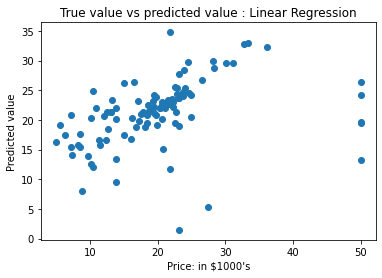

In [81]:
plt.scatter(y_test, y_pred_test) 
plt.xlabel("Price: in $1000's")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Linear Regression")
plt.show()

In [80]:
print('Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print("Score:", accuracy_score(np.round(y_test), np.round((pd.DataFrame(y_pred_test)))) )

Mean Squared Error:  9.062677026152478
Score: 0.06930693069306931
